In [23]:
import os
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 

In [16]:
df_raw = pd.read_csv('./data/Customer-Churn-Records.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [17]:
df_raw.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [18]:
df_raw.isnull().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [19]:
df_raw.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456


In [8]:
df_raw.CreditScore.describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [20]:
print(df_raw.Geography.unique())
print(df_raw.Gender.unique())
print(df_raw['Card Type'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']
['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']


In [21]:
df_raw['Card Type'].value_counts()

Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64

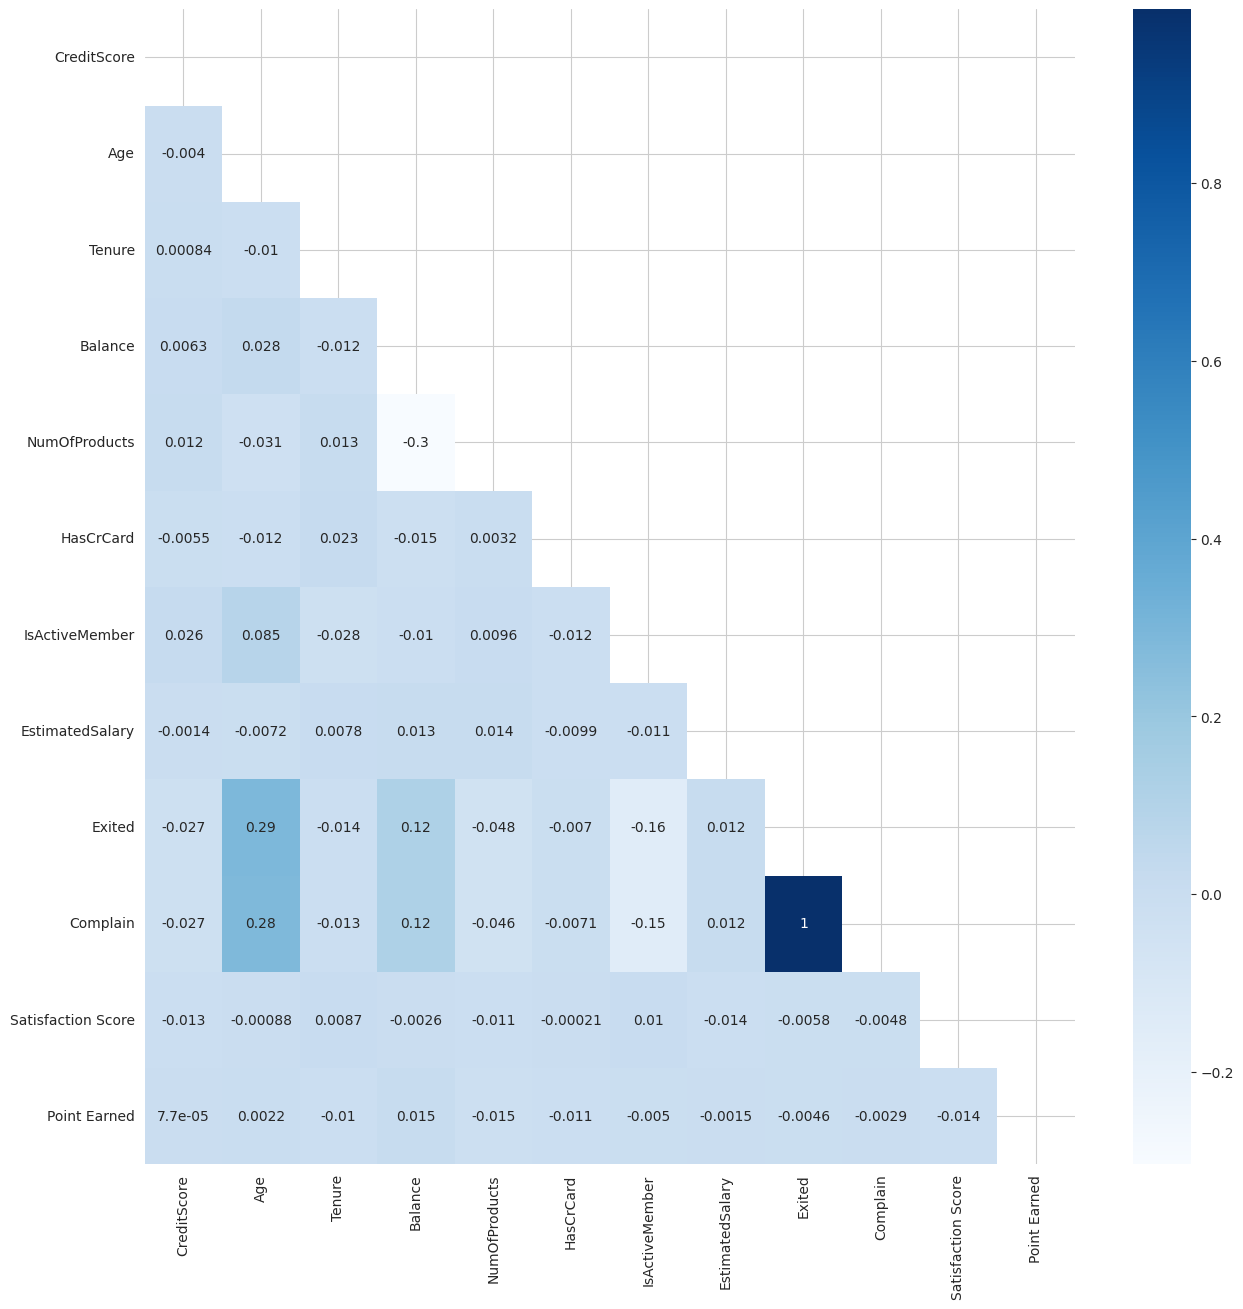

In [67]:
plt.rcParams['figure.figsize'] = (15,15)

df_corr = df_raw.drop(['Geography', 'Gender', 'Card Type'], axis=1).corr()

mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(df_corr, annot=True, cmap='Blues', mask=mask)

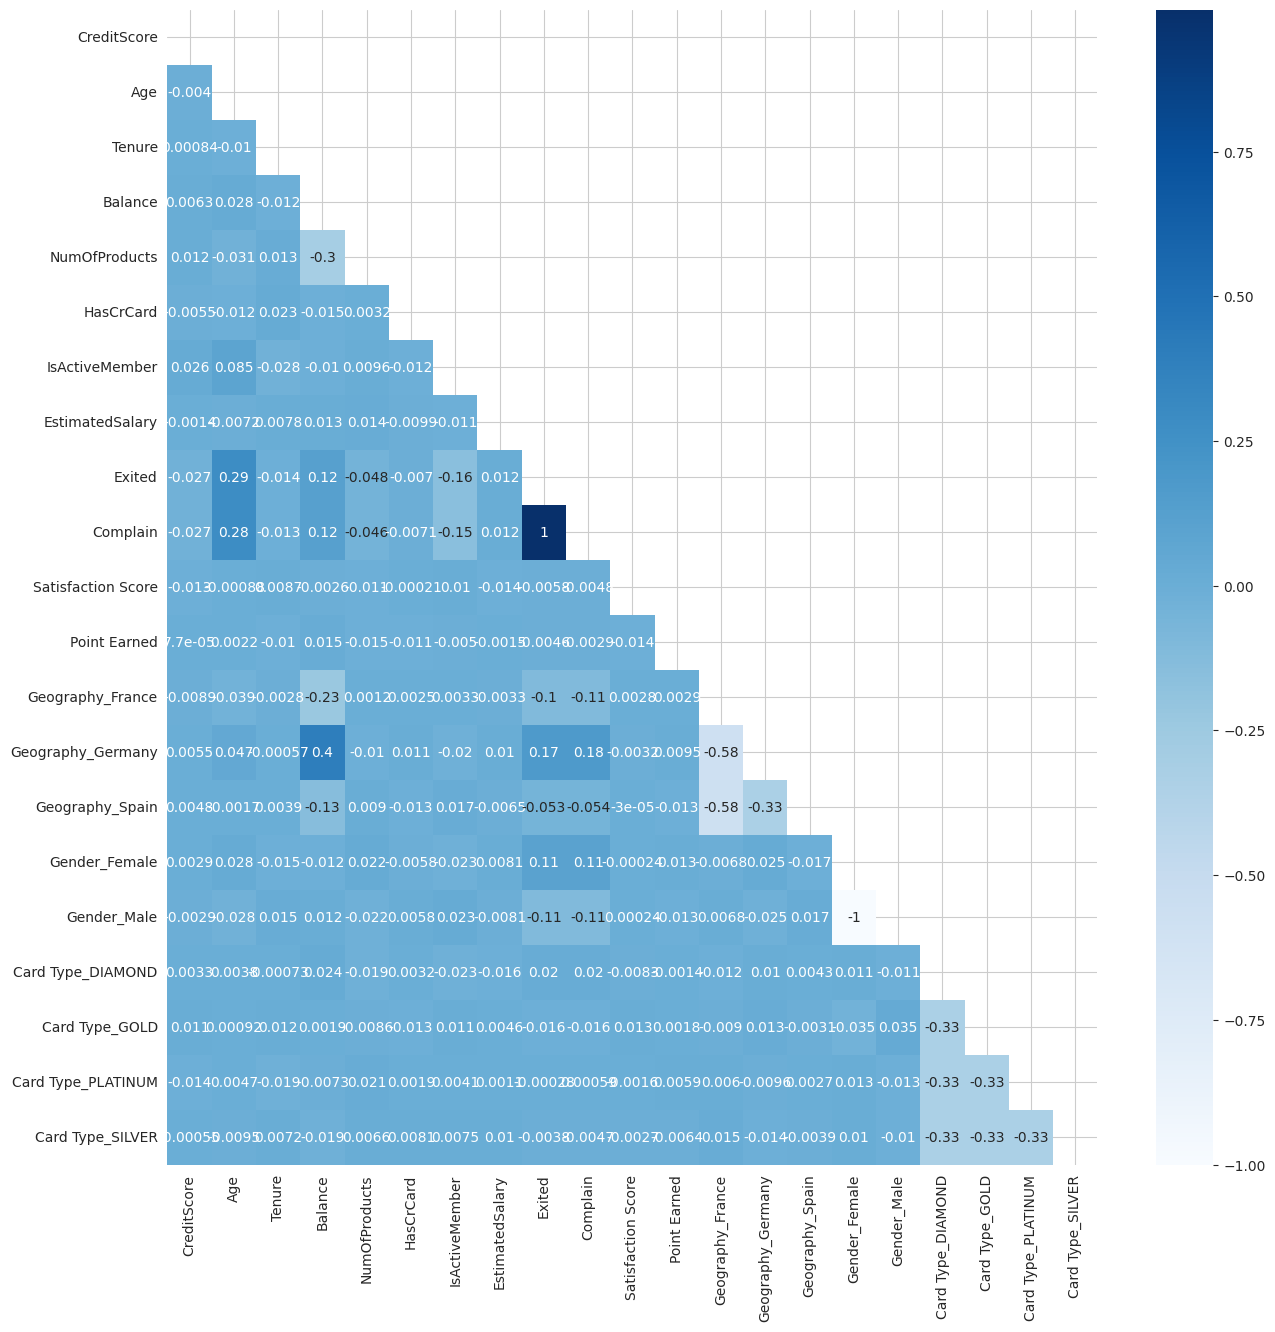

In [66]:
plt.rcParams['figure.figsize'] = (15,15)

df_dummies = pd.get_dummies(data = df_raw)

df_corr = df_dummies.corr()

mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(df_corr, annot=True, cmap='Blues', mask=mask)

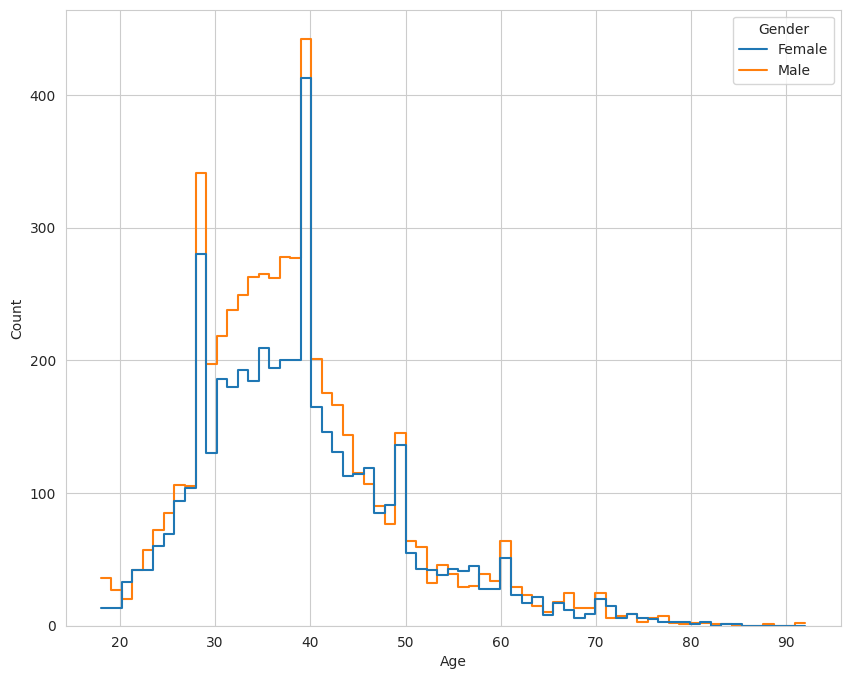

In [41]:
sns.set_style('whitegrid')
ax = sns.histplot(data=df_raw, x='Age', hue='Gender', element='step', fill=False )

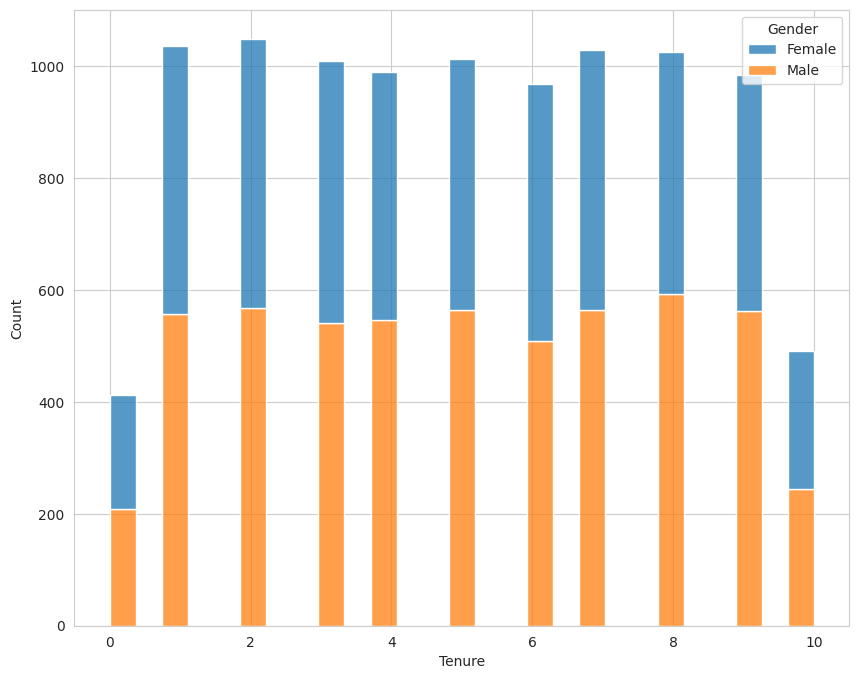

In [43]:
ax = sns.histplot(data=df_raw, x='Tenure', hue='Gender', multiple='stack')

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

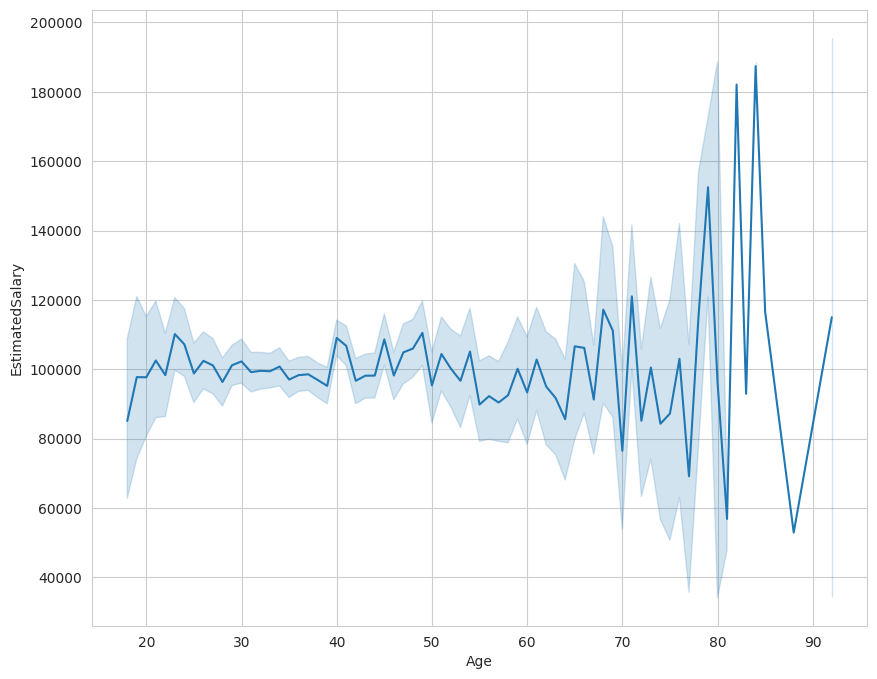

In [44]:
sns.lineplot(data=df_raw, x='Age', y='EstimatedSalary')

In [46]:
df_raw['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

<Axes: xlabel='Geography', ylabel='count'>

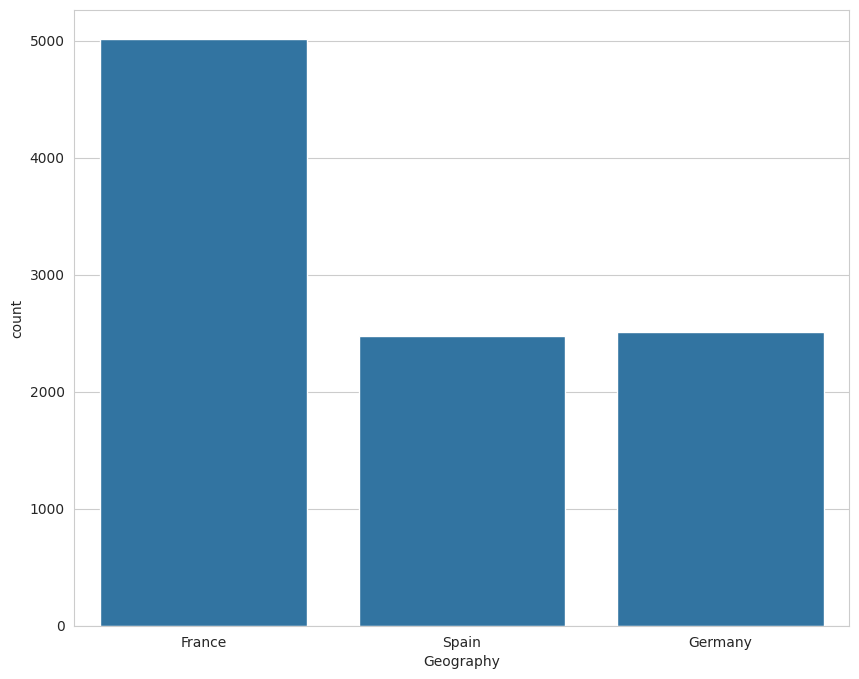

In [49]:
sns.countplot(data=df_raw, x='Geography')

In [59]:
df_raw.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
